# SENIOR HIGH

### Formula in getting the k_range

In [8]:
# formula in getting the k range by calculating the Square Root of Half the Sample Size
import math
import pandas as pd

df = pd.read_csv('C:/Thesis Refactor/APP/dataset/SHS.csv')

df_cebu = df[
    df['province'].str.contains('Cebu', na=False, case=False) |
    df['full_address'].str.contains('Cebu', na=False, case=False)
]

n = len(df_cebu)
upper_limit_k = math.sqrt(n / 2)
upper_limit_k = round(upper_limit_k)

print(f"Sample size: {n}")
print(f"Upper limit for k (Square Root of Half the Sample Size): {upper_limit_k}")

Sample size: 1624
Upper limit for k (Square Root of Half the Sample Size): 28


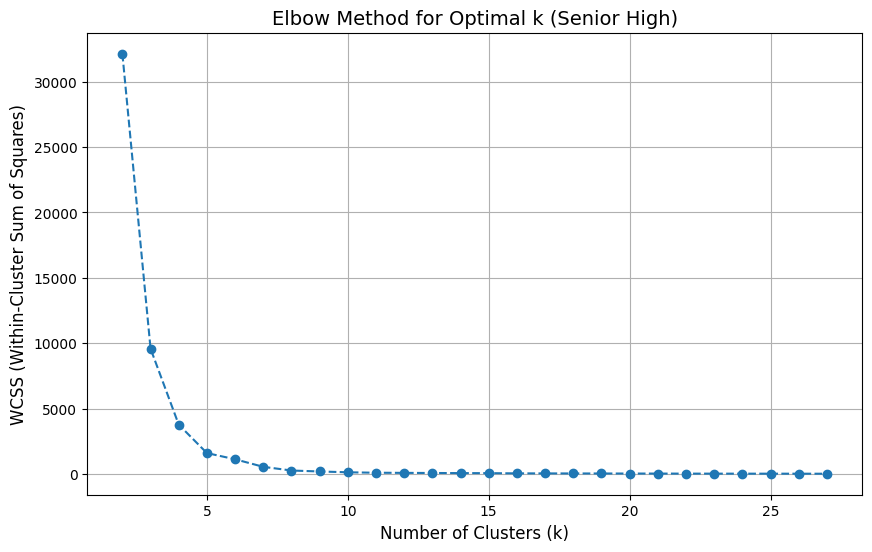

In [1]:
# get optimal k senior high student data elbow method

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os

# Set CPU limit
os.environ['LOKY_MAX_CPU_COUNT'] = '4'

# Load data
file_path = 'C:/Thesis Refactor/APP/dataset/shs.csv'
df = pd.read_csv(file_path)

# Remove missing or invalid coordinates
df = df.dropna(subset=['latitude', 'longitude'])
df = df[(df['latitude'] != 0) & (df['longitude'] != 0)]

# Extract latitude and longitude
X = df[['latitude', 'longitude']].values

wcss = []

K_range = range(2, 28)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, init='k-means++')
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(K_range, wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (k)', fontsize=12)
plt.ylabel('WCSS (Within-Cluster Sum of Squares)', fontsize=12)
plt.title('Elbow Method for Optimal k (Senior High)', fontsize=14)
plt.grid(True)
plt.show()


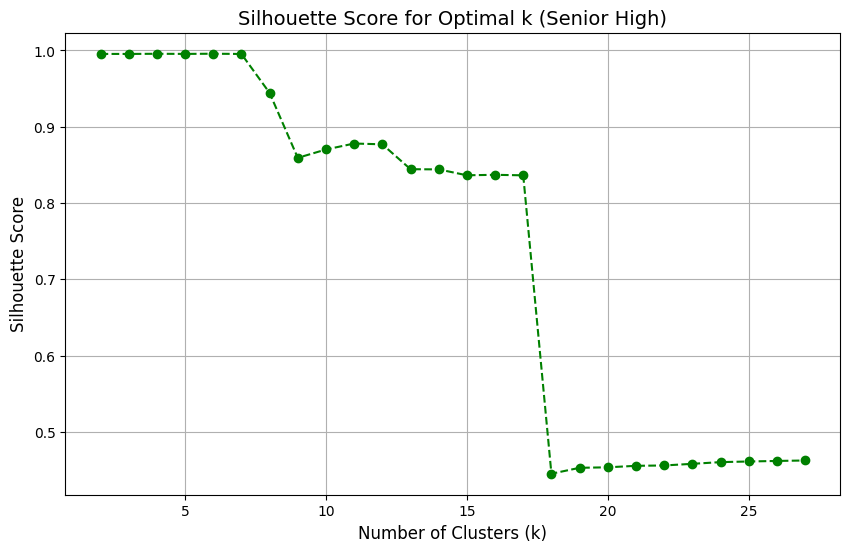

In [2]:
# get optimal k senior high student data elbow method silhouette score

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import os

# Set CPU limit
os.environ['LOKY_MAX_CPU_COUNT'] = '4'

# Load data
file_path = 'C:/Thesis Refactor/APP/dataset/shs.csv'
df = pd.read_csv(file_path)

# Remove missing or invalid coordinates
df = df.dropna(subset=['latitude', 'longitude'])
df = df[(df['latitude'] != 0) & (df['longitude'] != 0)]

# Extract latitude and longitude
X = df[['latitude', 'longitude']].values

# Store Silhouette Scores
silhouette_scores = []

K_range = range(2, 28)

# Perform K-means clustering for each k
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, init='k-means++')
    kmeans.fit(X)
    
    # Compute Silhouette Score
    score = silhouette_score(X, kmeans.labels_)
    silhouette_scores.append(score)

# Plot Silhouette Score
plt.figure(figsize=(10, 6))
plt.plot(K_range, silhouette_scores, marker='o', linestyle='--', color='green')
plt.xlabel('Number of Clusters (k)', fontsize=12)
plt.ylabel('Silhouette Score', fontsize=12)
plt.title('Silhouette Score for Optimal k (Senior High)', fontsize=14)
plt.grid(True)
plt.show()


# COLLEGE

In [5]:
# formula in getting the k range by calculating the Square Root of Half the Sample Size

import math
import pandas as pd

df = pd.read_csv('C:/Thesis Refactor/APP/dataset/college.csv')

df_cebu = df[
    df['province'].str.contains('Cebu', na=False, case=False) |
    df['full_address'].str.contains('Cebu', na=False, case=False)
]


n = len(df_cebu)
upper_limit_k = math.sqrt(n / 2)
upper_limit_k = round(upper_limit_k)

print(f"Sample size: {n}")
print(f"Upper limit for k (Square Root of Half the Sample Size): {upper_limit_k}")

Sample size: 6628
Upper limit for k (Square Root of Half the Sample Size): 58


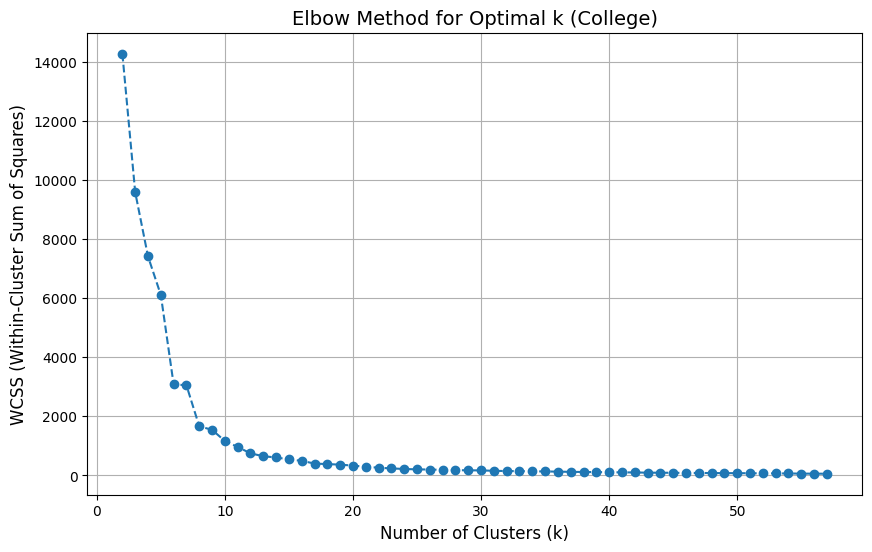

In [6]:
# get optimal k college student data elbow method

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os

# Set CPU limit
os.environ['LOKY_MAX_CPU_COUNT'] = '4'

file_path = 'C:/Thesis Refactor/APP/dataset/college.csv'
df = pd.read_csv(file_path)

# Remove missing or invalid coordinates
df = df.dropna(subset=['latitude', 'longitude'])
df = df[(df['latitude'] != 0) & (df['longitude'] != 0)]

# Extract latitude and longitude
X = df[['latitude', 'longitude']].values

wcss = []
K_range = range(2, 58)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, init='k-means++')
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(K_range, wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (k)', fontsize=12)
plt.ylabel('WCSS (Within-Cluster Sum of Squares)', fontsize=12)
plt.title('Elbow Method for Optimal k (College)', fontsize=14)
plt.grid(True)
plt.show()



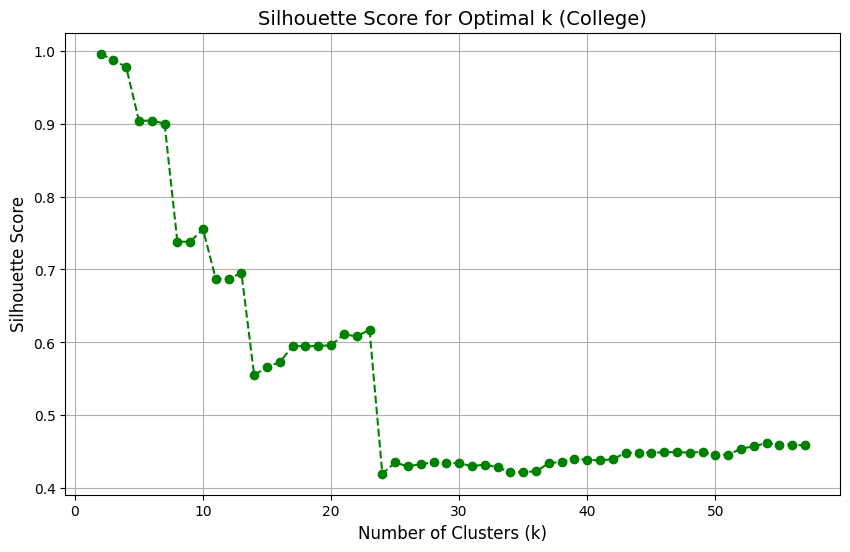

In [2]:
# get optimal k college student data silhouette score

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import os

# Set CPU limit
os.environ['LOKY_MAX_CPU_COUNT'] = '4'

# Load data
file_path = 'C:/Thesis Refactor/APP/dataset/college.csv'
df = pd.read_csv(file_path)

# Remove missing or invalid coordinates
df = df.dropna(subset=['latitude', 'longitude'])
df = df[(df['latitude'] != 0) & (df['longitude'] != 0)]

# Extract latitude and longitude
X = df[['latitude', 'longitude']].values

# Store Silhouette Scores
silhouette_scores = []

K_range = range(2, 58)

# Perform K-means clustering for each k
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, init='k-means++')
    kmeans.fit(X)
    
    # Compute Silhouette Score
    score = silhouette_score(X, kmeans.labels_)
    silhouette_scores.append(score)

# Plot Silhouette Score
plt.figure(figsize=(10, 6))
plt.plot(K_range, silhouette_scores, marker='o', linestyle='--', color='green')
plt.xlabel('Number of Clusters (k)', fontsize=12)
plt.ylabel('Silhouette Score', fontsize=12)
plt.title('Silhouette Score for Optimal k (College)', fontsize=14)
plt.grid(True)
plt.show()
